In [4]:
!pip install pandas pyarrow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 53.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [16]:
import pandas as pd
import pyarrow as pa
import glob

In [22]:
# pd.read_feather("/home/leigh/projects/printnanny-gst-plugin/.tmp/fixture_0_00000.ipc")


file_pattern = glob.glob("/home/leigh/projects/printnanny-gst-plugin/.tmp/*.ipc")
df = None
for f in file_pattern:
    with pa.ipc.open_stream(f) as reader:
        if df is None:
            df = reader.read_pandas()
        else:
            df = pd.concat([df,reader.read_pandas()])
df

,detection_boxes_x0,detection_boxes_y0,detection_boxes_x1,detection_boxes_y1,detection_classes,detection_scores,ts
0,0.526349,0.208802,0.997860,0.736488,2,0.902344,2146441441768762
1,0.769499,0.587252,1.004271,0.847053,3,0.804688,2146441441768762
2,0.518694,0.449993,0.559257,0.485034,0,0.652344,2146441441768762
3,0.773364,0.412974,0.992092,0.854805,1,0.500000,2146441441768762
4,0.824050,0.870139,0.944044,0.995659,2,0.382812,2146441441768762
...,...,...,...,...,...,...,...
35,0.537564,0.648279,0.694081,0.700828,3,0.011719,2146406149304817
36,0.560221,0.694288,0.689479,0.741774,0,0.011719,2146406149304817
37,0.591932,0.552550,0.668695,0.790509,4,0.011719,2146406149304817
38,0.610685,0.374599,0.713216,0.698384,4,0.011719,2146406149304817


<AxesSubplot:>

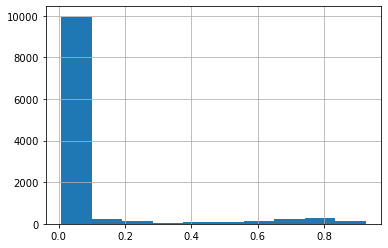

In [23]:
df["detection_scores"].hist()